In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import re, string
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [2]:
test_df = pd.read_csv('test_set.csv')
train_df = pd.read_csv('train_set.csv')

In [3]:
train_df

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [4]:
test_df

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


In [5]:
# Checking for null values
train_df.isnull().sum()

lang_id    0
text       0
dtype: int64

In [6]:
# languages
lang = list(train_df.lang_id.unique())
print(lang)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


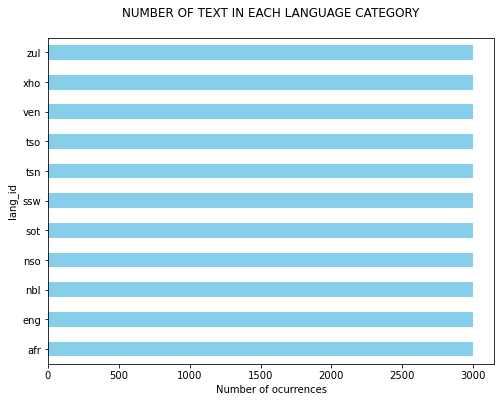

In [7]:
# plot of occurances in each language category
fig = plt.figure(figsize=(8,6))
colors = ['skyblue','skyblue','skyblue', 'skyblue']
train_df.groupby('lang_id').lang_id.count().sort_values().plot.barh(
ylim=0, color=colors, title= 'NUMBER OF TEXT IN EACH LANGUAGE CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [8]:
# As seen fron the above graph the language categories are very well balanced

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [10]:
train_df['text'] = train_df['text'].astype(str).values.tolist()

In [11]:
train_df['text'].head()

0                                                umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1                i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2    the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3                                                   o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele

In [12]:
test_df['text'] = test_df['text'].astype(str).values.tolist()

In [13]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini naticocisana.
4,5,Winste op buitelandse valuta.


In [14]:
def custom_preprocessor(text):
    '''
    Make text lowercase, remove text in square brackets,remove special characters
    and remove words containing numbers.
    '''
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # converting the text to lower case
    text = text.lower()
    
    return text

In [15]:
train_df['text'] = train_df['text'].apply(custom_preprocessor)

In [16]:
train_df.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [17]:
test_df['text'] = test_df['text'].apply(custom_preprocessor)

In [18]:
test_df.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelela kgato eo
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini naticocisana
4,5,winste op buitelandse valuta


In [19]:
# train_test split data
X = train_df['text']
y = train_df['lang_id']

In [20]:
X.shape

(33000,)

In [21]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Pipelines

In [22]:
# DecisionTreeClassifier Pipeline
tree_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df =1)),('tree', DecisionTreeClassifier()),])
tree_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                     
                             ngram_range = (1,2),
                             lowercase = False                        
                            )),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df =1)), ('rfc', RandomForestClassifier())])
rfc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                   
                             ngram_range = (1,2),
                             lowercase = False                       
                            )),('rfc', RandomForestClassifier()),])


# LinearSVC Pipeline
Lsvc_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df=1)),
                     ('scv', LinearSVC(class_weight= 'balanced' )),])
Lsvc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                       
                             ngram_range = (1,2),
                             lowercase = False                        
                            )),('svc', LinearSVC()),])

# Logistic Regression pipeline
logreg_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df=1)),('logistic', LogisticRegression()),])
logreg_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                     
                             ngram_range = (1,2),
                             lowercase = False                          
                            )),('logistic', LogisticRegression()),])



# SGD Classifier pipeline
SGD_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df=1)), ('SGD', SGDClassifier())])
SGD_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                  
                             ngram_range = (1,2),
                             lowercase = False                       
                            )),('SGD', SGDClassifier()),])




# Support Vector Classifier Pipeline
svc_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df=1)), ('SVC', SVC())])
svc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                   
                             ngram_range = (1,2),
                             lowercase = False                       
                            )),('SVC', SVC()),])

# Ridge Classifier
ridge_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df=1)), ('Ridge', RidgeClassifier())])
ridge_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                     
                             ngram_range = (1,2),
                             lowercase = False                         
                            )),('Ridge', RidgeClassifier()),])

# Multinomial Classifier
multino_tfidf = Pipeline([('tfidf', TfidfVectorizer(min_df=1)), ('multi', MultinomialNB())])
multino_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 20000,                     
                             ngram_range = (1,2),
                             lowercase = False                           
                            )),('multi', MultinomialNB()),])

#### Training models

In [23]:
# training the decision tree pipeline
tree_tfidf.fit(X_train, y_train)
tree_count.fit(X_train, y_train)

# training the RandomForest pipleline
rfc_tfidf.fit(X_train, y_train)
rfc_count.fit(X_train, y_train)

# training the LinearSVC pipeline
Lsvc_tfidf.fit(X_train, y_train)
Lsvc_count.fit(X_train, y_train)

# training the logistic regression pipeline
logreg_tfidf.fit(X_train, y_train)
logreg_count.fit(X_train, y_train)

# training the SGD Classifier
SGD_tfidf.fit(X_train, y_train)
SGD_count.fit(X_train, y_train)

# training the support vector classifier
svc_tfidf.fit(X_train, y_train)
svc_count.fit(X_train, y_train)

# training the Ridge classifier
ridge_tfidf.fit(X_train, y_train)
ridge_count.fit(X_train, y_train)

# Training the multi classifier
multino_tfidf.fit(X_train, y_train)
multino_count.fit(X_train, y_train)

Pipeline(steps=[('CountVec',
                 CountVectorizer(lowercase=False, max_features=20000,
                                 ngram_range=(1, 2))),
                ('multi', MultinomialNB())])

In [24]:
tree_acc =  accuracy_score(y_test,tree_tfidf.predict(X_test))
rfc_acc = accuracy_score(y_test,rfc_tfidf.predict(X_test))
lsvc_acc = accuracy_score(y_test,Lsvc_tfidf.predict(X_test))
log_acc = accuracy_score(y_test, logreg_tfidf.predict(X_test))
sgd_acc = accuracy_score(y_test, SGD_tfidf.predict(X_test))
svc_acc = accuracy_score(y_test, svc_tfidf.predict(X_test))
ridge_acc = accuracy_score(y_test, ridge_tfidf.predict(X_test))
multino_acc = accuracy_score(y_test, multino_tfidf.predict(X_test))

In [25]:
tfidf_avg_accuracy = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc,ridge_acc, multino_acc]),4)

In [50]:
print(tfidf_avg_accuracy)

0.9892


In [26]:
tree_acc1 =  accuracy_score(y_test,tree_count.predict(X_test))
rfc_acc1 = accuracy_score(y_test,rfc_count.predict(X_test))
lsvc_acc1 = accuracy_score(y_test,Lsvc_count.predict(X_test))
log_acc1 = accuracy_score(y_test, logreg_count.predict(X_test))
sgd_acc1 = accuracy_score(y_test, SGD_count.predict(X_test))
svc_acc1 = accuracy_score(y_test, svc_count.predict(X_test))
ridge_acc1 = accuracy_score(y_test, ridge_count.predict(X_test))
multino_acc1 = accuracy_score(y_test, multino_count.predict(X_test))

In [51]:
CountVec = round(np.mean([tree_acc1,rfc_acc1,lsvc_acc1,log_acc1,sgd_acc1,svc_acc1, ridge_acc1, multino_acc1]),4)

In [52]:
print(CountVec)

0.985


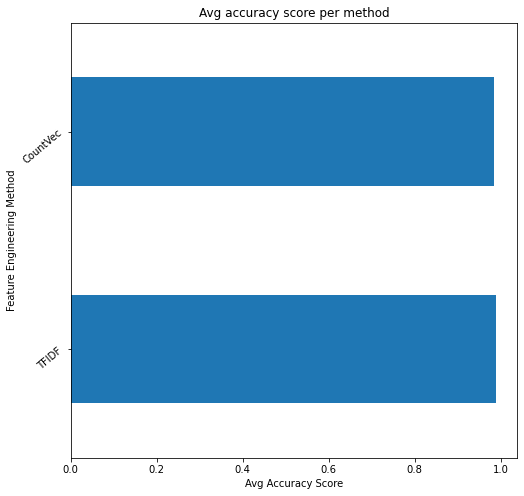

In [49]:
accuracy_dict = {'TFIDF':[tfidf_avg_accuracy], 'CountVec':[CountVec]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.T.plot(kind='barh', figsize = (8,8),legend = False)
plt.xlabel('Avg Accuracy Score')
plt.ylabel('Feature Engineering Method')
plt.yticks(rotation = 40)
plt.title('Avg accuracy score per method')
plt.show()

#### Making validations set predicions for tfidf

In [29]:
tree_prediction = tree_tfidf.predict(X_test) # DecisionTreeClassifier predictions
rfc_prediction = rfc_tfidf.predict(X_test) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc_tfidf.predict(X_test) # LinearSVClassifier Predictions
logreg_prediction =  logreg_tfidf.predict(X_test) # Logistic regression predictions
SGD_prediction = SGD_tfidf.predict(X_test) # SGD Classifier predictions
SVC_prediction = svc_tfidf.predict(X_test) # Support vector machine predictions
ridge_prediction = ridge_tfidf.predict(X_test) # Ridge predictions
multino_prediction = multino_tfidf.predict(X_test) # Ridge predictions

Linear SVC accuracy score and weighted avg f1 score

In [31]:
linearSVC_acc = round(accuracy_score(y_test, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_test, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')


Overall accuracy score for LinearSVC Model : 0.9973

Weighted avg f1 score for LinearSVC Model : 0.9973


Ridge Classifier accuracy score and weighted avg f1 score

In [32]:
# Checking the accuracy score
ridge_acc = round(accuracy_score(y_test, ridge_prediction),4)
print(f'\nRidge Classifier accuracy Score : {ridge_acc}')
ridge_f1 = round(f1_score(y_test, ridge_prediction, average="weighted"),4)
print(f'\nRidge Classifier weighted avg f1 score : {ridge_f1}')


Ridge Classifier accuracy Score : 0.9974

Ridge Classifier weighted avg f1 score : 0.9974


SVC classifier accuracy score and weighted avg f1 score

In [33]:
# Checking the accuracy score
svc_acc = round(accuracy_score(y_test, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score : {svc_acc}')
svc_f1 = round(f1_score(y_test, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1 score : {svc_f1}')


Support Vector Classifier accuracy Score : 0.9955

Support Vector Classifier weighted avg f1 score : 0.9955


SGD classifier accuracy score and weighted avg f1 score

In [34]:
# Checking the accuracy score
sgd_acc = round(accuracy_score(y_test, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)

# Checking the f1_score report for the decison tree model
sgd_f1 = round(f1_score(y_test, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)


SGD Classifier accuracy Score :
 0.997

SGD weighted avg f1_score :
 0.997


Logistic classifier accuracy score and weighted avg f1 score

In [35]:
logistic_reg_acc = round(accuracy_score(y_test, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_test, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)


Logistic Regression accuracy Score
 0.9948

Logistic Regression weighted f1 score
 0.9949


Decision classifier accuracy score and weighted avg f1 score

In [36]:
# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_test, tree_prediction),4)
print(f'\nOverall accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_test, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )


Overall accuracy score for Decision Tree : 0.948

Weighted avg f1 score Decision Tree 0.9481


Random classifier accuracy score and weighted avg f1 score

In [37]:
random_forest_acc = round(accuracy_score(y_test, rfc_prediction),4)
print(f'\nOverall accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_test, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')


Overal accuracy score for RandomForestClassifier :0.9852

Weighted f1 score for RandomForestClassifier : 0.9852


Multinomial classifier accuracy score and weighted avg f1 score

In [38]:
# Checking the accuracy score
multino_acc = round(accuracy_score(y_test, multino_prediction),4)
print(f'\nMultino Classifier accuracy Score : {multino_acc}')
multino_f1 = round(f1_score(y_test, multino_prediction, average="weighted"),4)
print(f'\nMultino Classifier weighted avg f1 score : {multino_f1}')


Multino Classifier accuracy Score : 0.9985

Multino Classifier weighted avg f1 score : 0.9985


#### Hyperparameter tuning multinomial classifier

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid_params = {
  'multi__alpha': np.linspace(0.5, 1.5, 6),
  'multi__fit_prior': [True, False],
}
clf = GridSearchCV(multino_tfidf, grid_params)
clf.fit(X_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.999128787878788
Best Params:  {'multi__alpha': 0.5, 'multi__fit_prior': True}


In [41]:
# Multinomial Classifier TUNED
multino_tfidf_tuned = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 6),
                             analyzer='char')), ('multi', MultinomialNB(alpha = 0.7, fit_prior = False, class_prior = None
))])

In [42]:
# Training the multi classifier
multino_tfidf_tuned.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 6))),
                ('multi', MultinomialNB(alpha=0.7, fit_prior=False))])

In [44]:
multino1_prediction = multino_tfidf_tuned.predict(X_test)

In [45]:
# Checking the accuracy score
multino_acc = round(accuracy_score(y_test, multino1_prediction),4)
print(f'\nMultino Classifier accuracy Score : {multino_acc}')
multino_f1 = round(f1_score(y_test, multino1_prediction, average="weighted"),4)
print(f'\nMultino Classifier weighted avg f1 score : {multino_f1}')


Multino Classifier accuracy Score : 0.9992

Multino Classifier weighted avg f1 score : 0.9992


#### Final Model Creation and CSV export

Multinomial classifier

In [46]:
final_pred2 = multino_tfidf_tuned.predict(test_df['text'])
print(final_pred2)

['tsn' 'nbl' 'ven' ... 'sot' 'sot' 'nbl']


In [47]:
submission = pd.DataFrame({'index': test_df['index'], 'lang_id': final_pred2 })
submission.to_csv('multino2_submission.csv', index = False)